<a href="https://colab.research.google.com/github/ConnorDemorest/AdvLinearAlgebra/blob/master/Copy_of_Project_4_Case_3_An_Interesting_Case_using_Singular_Values_and_Best_Fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#  Libraries that we'll need:
import numpy as np
import sympy as sym
#from scipy import misc
from scipy import linalg
#from PIL import Image
#import imageio
import matplotlib.pyplot as plt
# importing "random" for random operations 
import random 

#  Singular Value Decomposition and Best Fit

We look at some data generated here from three sources:

*   Case 0:  A known polynomial function $f(x) = 4 - 3x^2 + 5x^6$
*   Case 1:  A known trigonometric function $f(x) = 4 - 2\cos(x) + \cos^2 (x)$
*   Case 2:  A matrix of data $M$ (specified below) with unknown source function
*   Case 3:  An interesting case.

# Overview for Case 3:  An interesting case:

For Case 3, you have the option of completing one of the following tasks:

* **Option A:**  Re-do Case 0 or Case 1 by adding noise to the function.

Using $f$ + (2*random.random()-1)  will add a random number between -1 and 1 to the value of $f$.  How much noise can your method absorb and still produce accurate results?  (e.g. noise with a range of $-1$ to $1$?  noise from a range of $-5$ to $5$?  noise from $-30$ to $30$?)  Which method (best-fit or SVD) accommodates a larger range of error?

* **Option B:**  Best Fit for a plane

Instead of matching a function $x \to f(x)$ using a 8th degree polynomial, make a multivariable function $(x_1,x_2) \to f(x_1,x_2)$ where $f$ is a 3rd degree polynomial in $x_1$ and $x_2$. Generate data based on at least 16 different input points. Modify the procedure for choosing the $M$ matrix, and use Best Fit to find the best fit line. 


BONUS for Option B:  Do this for 3 dimensions, with noise, or modify the SVD solution to fit this option

* **Option C:**  The space of continuous functions of one variable has two different bases:


Given an unknown function, we figured out how to write it using basis of polynomials.  We could also have determined how to write it as a basis of powers of sine and cosine functions. Fit the polynomial $f(x) = 4 - 3x^2 + 5x^6$ to a basis of sine & cosine functions of at most power 4. Plot the original function and the best-fit function.

BONUS for Option C:  Include noise via $f(x)$ + (2*random.random()-1), and find a way to measure the error in your approximation to the function f(x).  What is the effect of this noise on your approximation?


In each case, it may be helpful to re-use data from the previous cases by copy-and-paste into cells below.  Be sure to specify which option you are addressing.

#3.1 Code for Option A: Adding noise to Case 0

Best fit method: 

In [0]:
actual_data_x = []
actual_data_y = []

noisy_data_y = []

#We'll use (cough... cough...) three   data points:
for i in range(20):
    # pick a random number between -5 and 5
    x = 6*random.random() - 3
    f = 4 - 3*x**2 + 5*x**6
    noise = f + (30*random.random() - 30)
    actual_data_x.append(x)
    actual_data_y.append(f)
    noisy_data_y.append(noise)

In [55]:
actual_data_x[:5]
actual_data_y[:5]
noisy_data_y[:5]

[-4.928115409209326,
 157.24605023475488,
 3417.4401415228785,
 7.000846684150893,
 553.9404943574891]

In [0]:
#Create the matrix M from the data in actual_data_x
M_entries = []

for x in actual_data_x:
  M_entries.append([1, x, x**2, x**3, x**4, x**5, x**6])

M = []
M = np.matrix(M_entries)

# Uses noisy data
b = []
b = (np.matrix(noisy_data_y)).transpose()

In [57]:
#  Find the solution to Mx = b using Best Fit:
#  (We've already used 'x' as a variable, so we'll call the solution vector c.)
c = linalg.inv(M.transpose() * M) * M.transpose() * b
c

matrix([[-7.66269407],
        [-9.91516386],
        [ 2.54953845],
        [ 7.67487191],
        [-3.17273686],
        [-1.08534468],
        [ 5.38470205]])

In [58]:
#  Let's see how close this actually gets us by comparing the original b vector to the result of Mc:
error = ((b-M*c).transpose() * (b-M*c))[0,0]
error**0.5

28.534127172264515

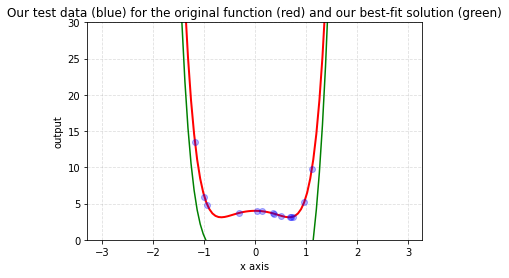

In [59]:
#Show a plot of the solutions using the best-fit method, and the SVD method:

# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-3, 3):
xdata = np.array(range(100))/(100/6) - 3
# find the ouput for our function on each data point:
fdata = 4 - 3*xdata**2 + 5*xdata**6

best_fit = c[0,0] + c[1,0]*xdata + c[2,0]*(xdata**2) + c[3,0]*(xdata**3) + c[4,0]*(xdata**4) + c[5,0]*(xdata**5) + c[6,0]*(xdata**6)
# Create the actual plot in red, and our datapoints in blue,
# and the best-fit method in green:  
plt.plot(xdata,fdata, color='red', linewidth=2 ) + plt.plot(actual_data_x, actual_data_y, 'bo', alpha=0.3)+plt.plot(xdata,best_fit, color='green')

#Restrict the output values to this range:
plt.ylim(-0,30)

# Add a title
plt.title('Our test data (blue) for the original function (red) and our best-fit solution (green)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

SVD method:

In [0]:
U, S, Vh = linalg.svd(M, full_matrices=True)

Vh = Vh.T

In [61]:
U

array([[-1.42783017e-03,  3.39630033e-03, -8.94192070e-02,
         1.33790533e-01, -3.28244512e-01, -2.38170631e-01,
        -9.60125912e-02, -3.22210789e-01, -2.38945571e-01,
        -1.95633341e-01, -1.08501149e-01, -3.05689769e-01,
        -2.39580408e-01, -1.91193211e-01, -4.07744373e-01,
         2.37082242e-01, -1.02550194e-01, -6.32068674e-02,
        -3.04088350e-01, -2.69440583e-01],
       [-5.07305791e-02,  5.08566427e-02, -5.23951636e-01,
        -5.89573143e-02, -2.34594970e-01, -3.62314758e-01,
         2.73446850e-01, -8.17337178e-03,  8.92949511e-02,
         1.18752902e-01, -1.51024474e-02,  1.61901731e-02,
         1.55737062e-01,  1.21002707e-01, -2.35994403e-01,
        -5.70646871e-01, -1.89178017e-02,  6.74112629e-02,
         1.83970669e-02,  8.75123050e-02],
       [-9.16565539e-01,  2.34574873e-01,  2.92411149e-01,
         5.17078559e-02, -4.80498827e-02, -8.48215129e-02,
         6.07637814e-03, -7.11199586e-03,  4.57749027e-03,
         1.08864847e-02, -2.7

In [62]:
S

array([801.59569929, 183.60693267,  16.26138215,   3.96573007,
         3.79782695,   1.12663694,   0.93169415])

In [63]:
Vh

array([[-2.16097992e-03, -6.71471856e-03, -1.05124032e-01,
         7.73057610e-01, -4.50287554e-01,  4.18446277e-01,
         1.15866062e-01],
       [-3.06126530e-03,  2.71508137e-02, -1.10056789e-01,
        -2.23629241e-01, -6.49076770e-01, -1.16308126e-01,
        -7.08733162e-01],
       [-1.55569315e-02, -3.02947889e-02, -3.04038283e-01,
         3.74736936e-01, -5.72680550e-02, -8.64726909e-01,
         1.22232981e-01],
       [-2.86883972e-02,  1.56020754e-01, -3.09040084e-01,
        -4.49553441e-01, -5.02663222e-01,  3.41580216e-02,
         6.50686826e-01],
       [-1.19283209e-01, -1.17264654e-01, -8.77742333e-01,
        -4.11069379e-02,  3.19780910e-01,  2.49235557e-01,
        -1.88469999e-01],
       [-2.61777739e-01,  9.47775962e-01, -3.02586925e-02,
         8.93750363e-02,  1.21695583e-01, -9.46128721e-04,
        -9.73598728e-02],
       [-9.57165006e-01, -2.48851807e-01,  1.32454514e-01,
        -1.29672419e-02, -5.40451346e-02, -1.83433232e-02,
         3.0630515

In [65]:
# We can compare the original matrix M to the matrix reconstructed (called a1) from the SVD:
# If they are close, then allclose(M, a1) should be True.

#First, recast S as a matrix instead of a vector:
sigma = np.zeros((U.shape[1], Vh.shape[0]))
for i in range(min(sigma.shape)):
     sigma[i, i] = S[i]
#Reconstruct the matrix:
a1 = np.dot(U, np.dot(sigma, Vh.T))

#does a1 approximate M?
np.allclose(M, a1)

True

In [0]:
#  Based on the number of non-zero singular values in S, divide each of U, sigma, and Vh into 
#  U_use, Sigma_use, and Vh_use.
#  and  discard U_d, Sigma_d, Vh_d
useSigs = 7

#Use these parts of U, S, and Vh
(Vrows, Vcols) = Vh.shape
(Urows, Ucols) = U.shape
U_use = U[:Urows, :useSigs]
Vh_use = Vh[:Vrows, :useSigs]
sigma_use = sigma[:useSigs, :useSigs]

#discard these parts of U, S, and Vh:
U_d = U[:Urows, useSigs:]
Vh_d = Vh[:Vrows, useSigs:]
sigma_d = sigma[useSigs:, useSigs:]

In [67]:
#  If we use Singular Value Decomposition to break down M as a product of matrices
#  M = U sigma Vh.conjugate_transpose()
#  Then the part of A which corresponds to non-zero singular values is:
#  M_use = U_use sigma_use Vh_use.conjugate_transpose()
#
#  So, the equation Mx = b becomes:  (U_use sigma_use Vh_use.conjugate_transpose()) x = b
#  or
#  svd_sol = (U_use sigma_use Vh_use.conjugate_transpose()).inverse() b
#  or
#  svd_sol = Vh_use * Sigma_use.inverse() * U_use.transpose() * b
#  (since Vh_use.conjugate_transpose() = Vh_use.inverse() and U_use.transpose() = U_use.inverse() )
svdsol = (Vh_use @ linalg.inv(sigma_use) @ U_use.transpose()) @ b
svdsol

matrix([[-7.66269407],
        [-9.91516386],
        [ 2.54953845],
        [ 7.67487191],
        [-3.17273686],
        [-1.08534468],
        [ 5.38470205]])

In [68]:
#  Let's see how close this actually gets us by comparing the original b vector to the result of Mc:
error = ((b-M*svdsol).transpose() * (b-M*svdsol))[0,0]
error**0.5

28.53412717226455

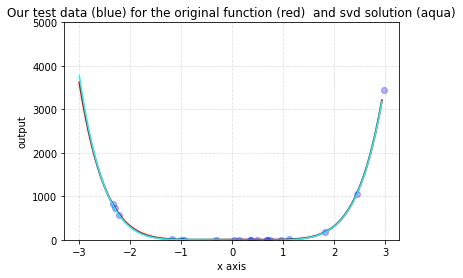

In [69]:
#Show a plot of the solutions using the best-fit method, and the SVD method:

# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-3, 3):
xdata = np.array(range(100))/(100/6) - 3
# find the ouput for our function on each data point:
fdata = 4 - 3*xdata**2 + 5*xdata**6

#construct the solution from svdsol
svd_fit = svdsol[0,0] + svdsol[1,0]*xdata + svdsol[2,0]*(xdata**2) + svdsol[3,0]*(xdata**3) + svdsol[4,0]*(xdata**4) + svdsol[5,0]*(xdata**5) + svdsol[6,0]*(xdata**6)
# Create the actual plot in red, and our datapoints in blue,
# and the svd solution in aqua:  
plt.plot(xdata,fdata, color='red', linewidth=2 ) + plt.plot(actual_data_x, actual_data_y, 'bo', alpha=0.3) + plt.plot(xdata, svd_fit, 'aqua')

#Restrict the output values to this range:
plt.ylim(-0,5000)
# Add a title
plt.title('Our test data (blue) for the original function (red)  and svd solution (aqua)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

Findings 

I basically just copy/pasted your code and made it noisy, it seemed like the simplest of the things that you suggested. 

I found that for smaller amounts of noisiness, the two methods were very close in the amount of error, but at large amounts of noisiness (100x) the best fit performed better. 

It seems like the best fit method is the best for very noisy data, but the SVD method is better for less noisy data because it would take less space. 